# EDA - Exploratory Data Analysis of Used Mercedes Cars

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
data = pd.read_csv('data_cleaned.csv')

In [3]:
data.shape

(11974, 33)

In [4]:
data.describe()

,Unnamed: 0,price,milage,hubraum,age,power_ps,power_kw,amg,mc_laren,blk_series,...,avantgarde,elegance,tag_63,tag_65,tag_55,tüv,E10,biodiesel,pflanzenöl,electric
count,11974.000000,11974.000000,11974.000000,11974.000000,11974.000000,11974.000000,11974.000000,11974.000000,11974.0,11974.000000,...,11974.000000,11974.000000,11974.000000,11974.000000,11974.000000,11974.000000,11974.000000,11974.000000,11974.000000,11974.000000
mean,6024.030900,40407.511024,93641.369634,2562.195831,5.143505,247.087852,181.771200,0.417822,0.0,0.000501,...,0.102973,0.015200,0.078002,0.003675,0.002171,0.030232,0.076082,0.001336,0.000418,0.061383
std,3480.596274,34251.222890,96669.990081,929.661095,6.115936,132.334413,97.325005,0.493221,0.0,0.022380,...,0.303936,0.122351,0.268186,0.060510,0.046549,0.171233,0.265140,0.036532,0.020431,0.240042
min,0.000000,350.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3010.250000,9999.000000,13591.000000,1950.000000,0.083333,160.000000,118.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6019.500000,32900.000000,57530.000000,2148.000000,2.833333,194.000000,143.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9035.750000,63248.000000,154094.750000,2987.000000,9.416667,299.000000,220.000000,1.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,12071.000000,145000.000000,800000.000000,7180.000000,29.916667,850.000000,625.000000,1.000000,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11974 entries, 0 to 11973
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      11974 non-null  int64  
 1   carname         11974 non-null  object 
 2   price           11974 non-null  float64
 3   milage          11974 non-null  float64
 4   hubraum         11974 non-null  float64
 5   transmission    11974 non-null  object 
 6   num_seats       11974 non-null  object 
 7   num_doors       11974 non-null  object 
 8   emission_class  11974 non-null  object 
 9   car_type        11974 non-null  object 
 10  num_owners      11974 non-null  object 
 11  age             11974 non-null  float64
 12  power_ps        11974 non-null  float64
 13  power_kw        11974 non-null  float64
 14  Schaden         11974 non-null  object 
 15  Model           11974 non-null  object 
 16  amg             11974 non-null  int64  
 17  mc_laren        11974 non-null 

In [6]:
# check for columns that contain NaNs
nan_cols = [i for i in data.columns if data[i].isnull().any()]
print(nan_cols)

[]


- There are no NaNs in the Dataset!

In [7]:
data.head()

,Unnamed: 0,carname,price,milage,hubraum,transmission,num_seats,num_doors,emission_class,car_type,...,elegance,tag_63,tag_65,tag_55,tüv,E10,biodiesel,pflanzenöl,electric,fueltype
0,0,Mercedes-Benz Mercedes vaneo mit 2 jahre tüv t...,1900.0,278000.0,3564.923077,Schaltgetriebe,na,na,na,andere,...,0,0,0,0,1,0,0,0,0,Diesel
1,1,Mercedes-Benz Mercedes-Benz A 170 Autotronic A...,1500.0,390000.0,1662.038633,Automatik,na,na,na,limousine,...,0,0,0,0,0,0,0,0,0,Benzin
2,2,Mercedes-Benz Mercedes A140 Elegance Piccadilly,1700.0,130000.0,1662.038633,Schaltgetriebe,na,na,na,andere,...,1,0,0,0,0,0,0,0,0,Benzin
3,3,Mercedes-Benz Mercedes-benz A160,1550.0,154079.0,1662.038633,Automatik,na,na,na,kleinwagen,...,0,0,0,0,0,0,0,0,0,Benzin
4,4,Mercedes-Benz CLK Coupe 200 Elegance Automatik,1200.0,175000.0,1998.000000,Automatik,4,2/3,na,sport,...,1,0,0,0,0,0,0,0,0,Benzin


In [8]:
data.columns

Index(['Unnamed: 0', 'carname', 'price', 'milage', 'hubraum', 'transmission',
       'num_seats', 'num_doors', 'emission_class', 'car_type', 'num_owners',
       'age', 'power_ps', 'power_kw', 'Schaden', 'Model', 'amg', 'mc_laren',
       'blk_series', 'blue_eff', 'g_pow', 'brabus', 'avantgarde', 'elegance',
       'tag_63', 'tag_65', 'tag_55', 'tüv', 'E10', 'biodiesel', 'pflanzenöl',
       'electric', 'fueltype'],
      dtype='object')

## 1. Categorical features

In [9]:
def barplot_save(key):
    df = data.groupby(key, as_index=False)['price'].mean()
    print(df)
    fig, ax = plt.subplots(figsize=(6, 5))
    plt.title(key +' Mean Price Barplot')
    sns.barplot(data=df.sort_values("price", ascending=False), y=key, x='price')
    fig.savefig('./Plots/barplot_' + key + '.png', dpi=300)

        Model          price
0    A-Klasse   13711.563000
1    B-Klasse   15775.456722
2    C-Klasse   24131.442892
3          CL   42352.425287
4         CLA   31603.617647
5         CLC    6802.700000
6         CLK    7187.593220
7    E-Klasse   35601.632551
8    G-Klasse   92595.938567
9          GL   32490.000000
10        GLA   34974.105820
11        GLB   46169.472727
12        GLC   51922.469522
13        GLE   78226.661538
14        GLK   15269.674699
15        GLS   87133.558824
16         GT  102830.646617
17   M-Klasse   14387.428571
18  MarcoPolo   67623.826087
19      OTHER   41872.674177
20   R-Klasse   66979.981132
21   S-Klasse   81855.211765
22         SL   46709.763158
23   Sprinter   17285.145455
24   V-Klasse   50220.907285
25      Vaneo    9885.298969
26       Vito   17456.073016


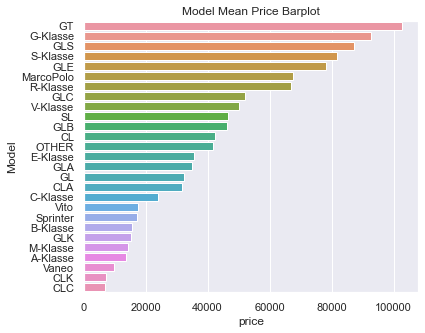

In [10]:
barplot_save('Model')

  num_owners         price
0          0  83555.750000
1          1  58308.773408
2          2  32025.789223
3          3  17879.075410
4          4  10797.280000
5          5  15069.571429
6          6   2425.000000
7          9  55752.000000
8         na  19324.119079


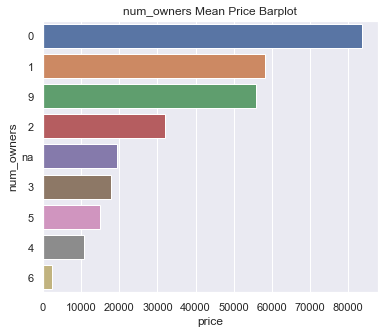

In [11]:
barplot_save('num_owners')

In [12]:
def count_boxplot(key):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.title(key +' Histogram')
    sns.countplot(data=data, y=key,  order = data[key].value_counts().index, palette=("magma"))
    plt.subplot(1,2,2)
    plt.title(key +' vs Price')
    sns.boxplot(y=data[key], x=data.price, order = data[key].value_counts().index, palette=("magma"))
    plt.show()

In [13]:
def countplot_save(key):
    fig, ax = plt.subplots(figsize=(6, 5))
    plt.title(key +' Histogram')
    sns.countplot(data=data, y=key,  order = data[key].value_counts().index, palette=("magma"))
    fig.savefig('./Plots/' + key + '.png', dpi=300)

In [14]:
def countplot(key, dataframe=data):
    sns.countplot(y=key, data=data, order = data[key].value_counts().index)

In [15]:
counts = data.Model.value_counts()
print(counts)

C-Klasse     2075
E-Klasse     2003
A-Klasse     1000
S-Klasse      850
GLE           845
GLC           607
V-Klasse      604
OTHER         577
B-Klasse      543
CL            348
Vito          315
G-Klasse      293
Sprinter      275
CLA           272
M-Klasse      203
SL            190
GLA           189
GLS           136
GT            133
CLK           118
Vaneo          97
GLK            83
GLB            55
R-Klasse       53
MarcoPolo      46
GL             44
CLC            20
Name: Model, dtype: int64


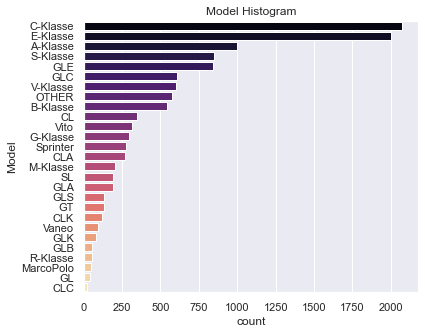

In [16]:
#count_boxplot('Model')
countplot_save('Model')

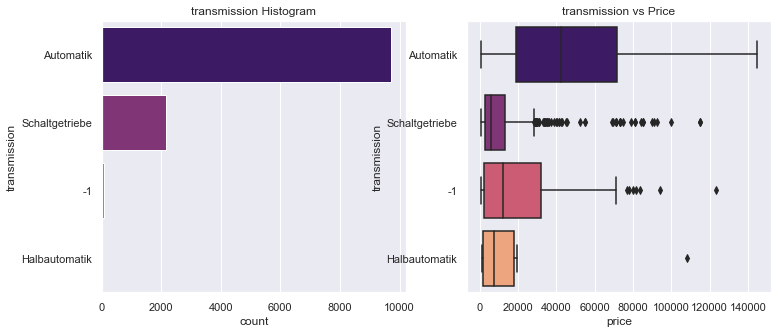

In [17]:
count_boxplot('transmission')

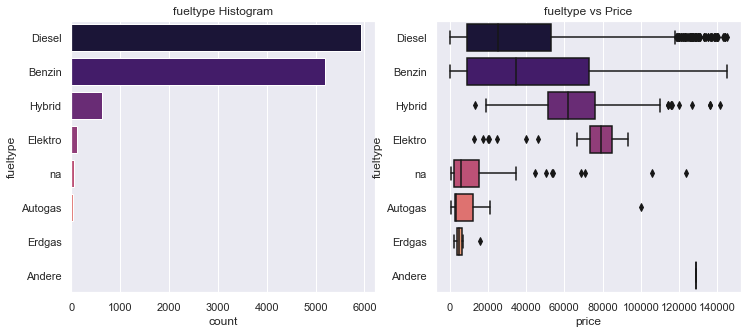

In [18]:
count_boxplot('fueltype')

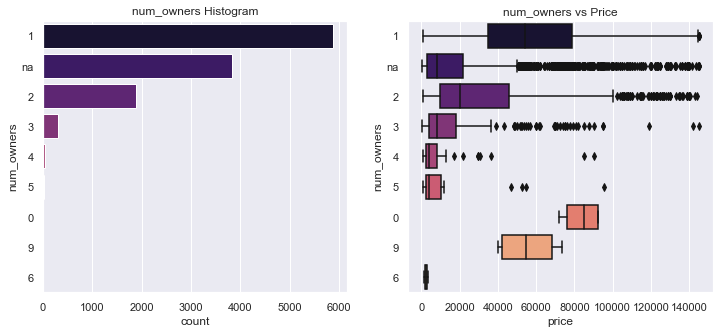

In [19]:
count_boxplot('num_owners')

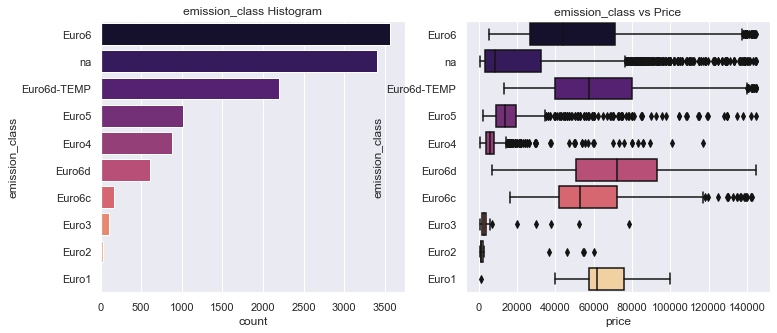

In [20]:
count_boxplot('emission_class')

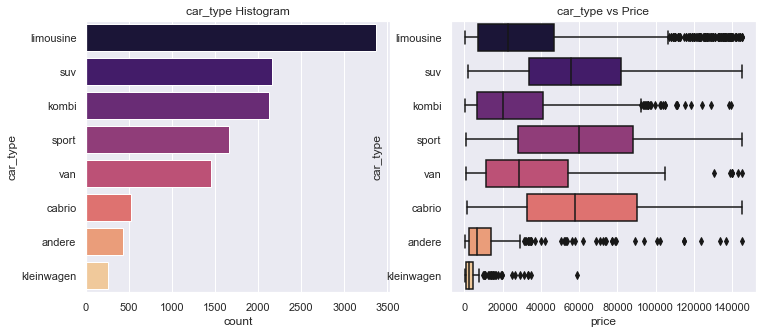

In [21]:
count_boxplot('car_type')

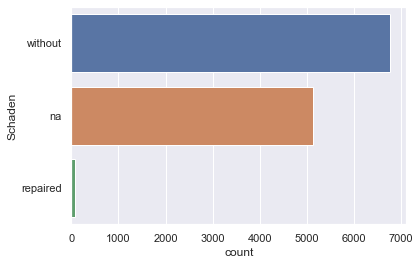

In [22]:
countplot('Schaden')

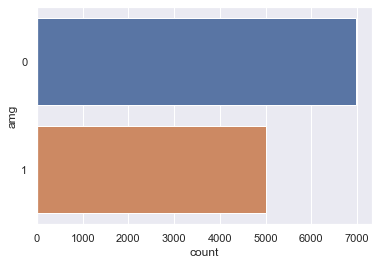

In [23]:
countplot('amg')

## 2. Numerical Data

In [24]:
def histplot_save(key):
    fig, ax = plt.subplots(figsize=(8, 5))
    plt.title(key +' Histogram')
    sns.histplot(data[key], kde=True, palette=("magma"))
    fig.savefig('./Plots/histplot_' + key + '.png', dpi=300)

### 2.1. Price

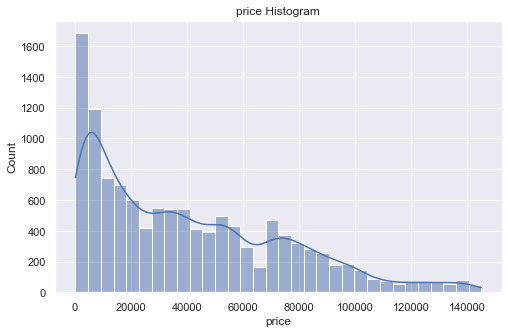

In [25]:
histplot_save('price')

In [26]:
data.price.mean()

40407.51102388508

### 2.2. Milage

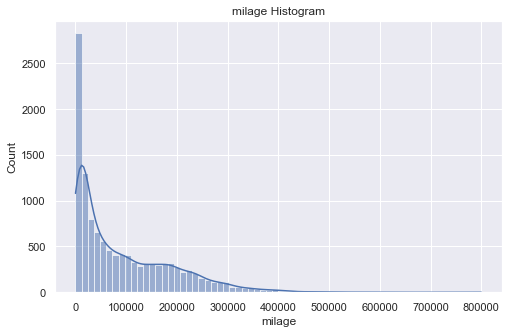

In [27]:
histplot_save('milage')

### 2.3. Power

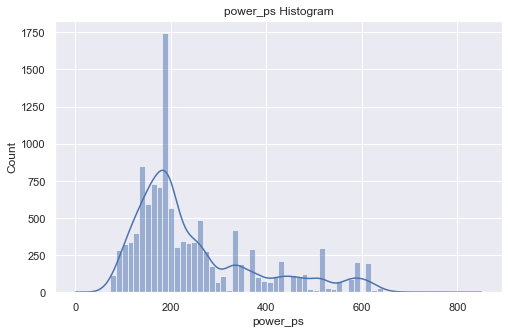

In [28]:
histplot_save('power_ps')

In [29]:
data.power_ps.mean()

247.0878521197146

In [30]:
data.power_kw.mean()

181.77120034357122

### 2.4. Age

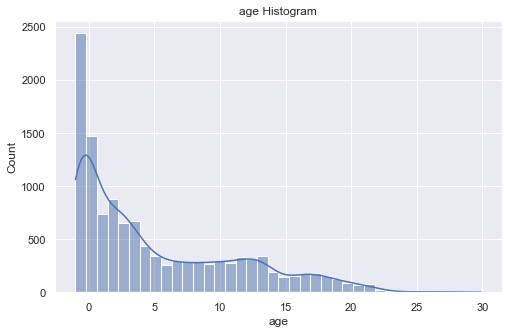

In [31]:
histplot_save('age')

In [32]:
print('mean age of cars:', data.age.mean(), '[years]')

mean age of cars: 5.143505372752074 [years]


### 2.5. Hubraum

<AxesSubplot:xlabel='hubraum', ylabel='Count'>

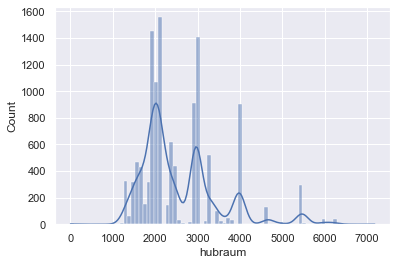

In [33]:
sns.histplot(data.hubraum, kde=True)

In [34]:
def scatter_plot(key, hue=None, size=7, savename=None):
    fig, ax = plt.subplots(figsize=(6, 5)) 
    sns.scatterplot(data=data, y='price', x=key, s=size, hue=hue, palette=("magma"))
    plt.title(key + ' vs. Price')
    plt.xlabel(key)
    plt.ylabel('Price')
    plt.tight_layout()
    ax.xaxis.set_major_formatter(ticker.EngFormatter())
    ax.yaxis.set_major_formatter(ticker.EngFormatter())
    plt.show()
    if savename is not None:
        fig.savefig('Plots/'+savename+'.png', dpi=300)
    

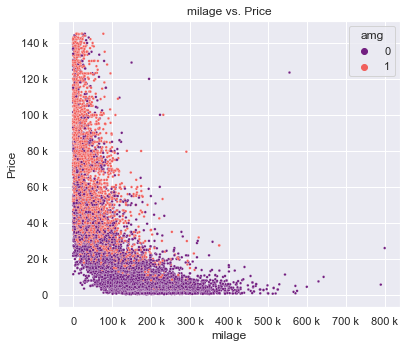

In [35]:
scatter_plot('milage', hue='amg', savename='price_milage2')

#### Inference
- "price" negatively correlates with "milage" --> price decreases exponentially over "milage"
- "price" seems to positively correlate with "AMG" tag

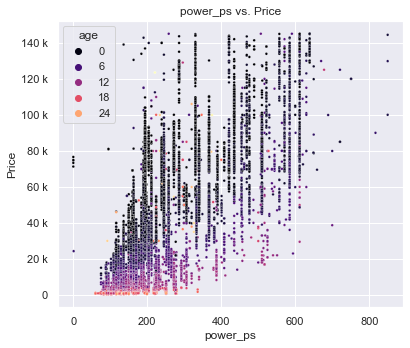

In [36]:
scatter_plot('power_ps', hue='age', savename='price_power_ps')

#### Inference

- "power_ps" correlates positively with "price"
- "age" is a indicator for price, too

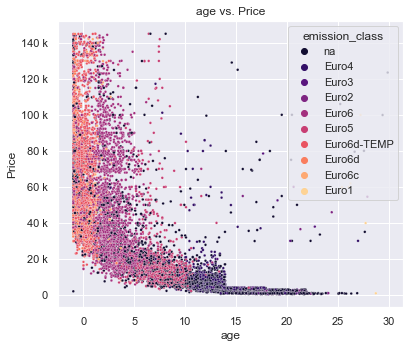

In [37]:
scatter_plot('age', hue='emission_class', savename='price_age')

#### Inference

- You see how the emission classes groups the cars in different age stamps
- price decreases exponentially with age
- emission_class can be indicator for price, too

## Correlation matrix

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11974 entries, 0 to 11973
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      11974 non-null  int64  
 1   carname         11974 non-null  object 
 2   price           11974 non-null  float64
 3   milage          11974 non-null  float64
 4   hubraum         11974 non-null  float64
 5   transmission    11974 non-null  object 
 6   num_seats       11974 non-null  object 
 7   num_doors       11974 non-null  object 
 8   emission_class  11974 non-null  object 
 9   car_type        11974 non-null  object 
 10  num_owners      11974 non-null  object 
 11  age             11974 non-null  float64
 12  power_ps        11974 non-null  float64
 13  power_kw        11974 non-null  float64
 14  Schaden         11974 non-null  object 
 15  Model           11974 non-null  object 
 16  amg             11974 non-null  int64  
 17  mc_laren        11974 non-null 

In [39]:
#df_num = data.drop(["carname", "Unnamed: 0", "transmission", "num_seats", "num_doors", "emission_class", "car_type", "num_owners", "Schaden", "Model", "fueltype"], axis=1)
df_num = data[['price', 'milage', 'age', 'hubraum', 'power_ps', 'power_kw', 'tag_63']]
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11974 entries, 0 to 11973
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     11974 non-null  float64
 1   milage    11974 non-null  float64
 2   age       11974 non-null  float64
 3   hubraum   11974 non-null  float64
 4   power_ps  11974 non-null  float64
 5   power_kw  11974 non-null  float64
 6   tag_63    11974 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 655.0 KB


In [40]:
corrmat = df_num.corr()
print(corrmat)

             price    milage       age   hubraum  power_ps  power_kw    tag_63
price     1.000000 -0.669170 -0.688447  0.481816  0.717622  0.717918  0.332893
milage   -0.669170  1.000000  0.782183 -0.050345 -0.344957 -0.345343 -0.124950
age      -0.688447  0.782183  1.000000 -0.038451 -0.351754 -0.352239 -0.114727
hubraum   0.481816 -0.050345 -0.038451  1.000000  0.814363  0.814247  0.561664
power_ps  0.717622 -0.344957 -0.351754  0.814363  1.000000  0.999998  0.642753
power_kw  0.717918 -0.345343 -0.352239  0.814247  0.999998  1.000000  0.642397
tag_63    0.332893 -0.124950 -0.114727  0.561664  0.642753  0.642397  1.000000


<AxesSubplot:>

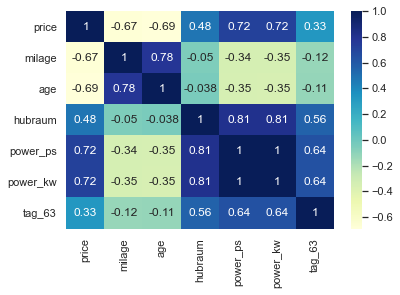

In [41]:
#Correlation using heatmap
#plt.figure(figsize = (40+6, 35+6))
sns.heatmap(corrmat, annot = True, cmap="YlGnBu")
#plt.show()

In [42]:
data_dummies = data.drop(['carname', 'Unnamed: 0', 'power_kw'], axis=1)
print(data_dummies.columns)
data_dummies = pd.get_dummies(data_dummies)

Index(['price', 'milage', 'hubraum', 'transmission', 'num_seats', 'num_doors',
       'emission_class', 'car_type', 'num_owners', 'age', 'power_ps',
       'Schaden', 'Model', 'amg', 'mc_laren', 'blk_series', 'blue_eff',
       'g_pow', 'brabus', 'avantgarde', 'elegance', 'tag_63', 'tag_65',
       'tag_55', 'tüv', 'E10', 'biodiesel', 'pflanzenöl', 'electric',
       'fueltype'],
      dtype='object')


In [43]:
import statsmodels.api as sm

In [44]:
y = data_dummies["price"]
X = data_dummies.drop("price", axis=1)

In [45]:
type(X)

pandas.core.frame.DataFrame

In [46]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score

## Train-Test Split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=True)

In [48]:
type(X_train)

pandas.core.frame.DataFrame

## Scale Features

In order to have the ML algorithms work well, we have to scale the features. We calculate the mean and standart deviation of the train dataset and with that values we scale both the train and test dataset. MinMax Scaler scales to whatever range we want, for example (-1, 1). StandardScaler scales to zero mean and unit variance.

In [49]:
method = 'MinMax'

if method == 'Standard':
    scaler = StandardScaler().fit(X_train)
elif method == 'MinMax':
    scaler = MinMaxScaler(feature_range=(0, 1)).fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [50]:
y_train = pd.DataFrame(y_train.values)
y_test = pd.DataFrame(y_test.values)

## Automate Feature Selection and Regression with Statsmodels

In [51]:
print('Dropping features with p-value P(t) > 0.05: \n')
cols = list(X_train.columns)
pmax = 1
i = 1
while (len(cols) > 0):
    p = []
    X_1 = X_train
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y_train, X_1).fit()
    p = pd.Series(model.pvalues.values[1:], index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if pmax > 0.05:
        cols.remove(feature_with_p_max)
        X_train = X_train.drop(feature_with_p_max, axis=1)
        print(i,'. Dropped', feature_with_p_max, 'with p-value', pmax)
        i += 1
    else:
        break
selected_features = cols
print('\n\nSelected features: \n\n', selected_features)

Dropping features with p-value P(t) > 0.05: 

1 . Dropped num_seats_7 with p-value 0.965522039811646
2 . Dropped Model_GL with p-value 0.9070674947608398
3 . Dropped num_owners_na with p-value 0.7441341710389072
4 . Dropped g_pow with p-value 0.840247188139745
5 . Dropped num_seats_19 with p-value 0.7150313029232136
6 . Dropped fueltype_Autogas with p-value 0.7093234335739786
7 . Dropped num_owners_9 with p-value 0.7071214341235951
8 . Dropped num_seats_6 with p-value 0.6557983513817034
9 . Dropped mc_laren with p-value 0.9230100988328352
10 . Dropped num_seats_9 with p-value 0.6193710479856613
11 . Dropped num_seats_20 with p-value 0.7805382225256307
12 . Dropped fueltype_Benzin with p-value 0.6018494960798951
13 . Dropped num_owners_6 with p-value 0.595245057201738
14 . Dropped Model_V-Klasse with p-value 0.5882661562721703
15 . Dropped num_owners_4 with p-value 0.5320528124659174
16 . Dropped emission_class_Euro3 with p-value 0.524106142748884
17 . Dropped car_type_suv with p-value 

In [52]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     848.8
Date:                Sat, 09 Jan 2021   Prob (F-statistic):               0.00
Time:                        03:54:08   Log-Likelihood:                -90883.
No. Observations:                8381   AIC:                         1.819e+05
Df Residuals:                    8314   BIC:                         1.824e+05
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       2.271e+04   1371.507     16.557      0.000       2e+04    2.54e+04
milage                     -4.242e+04   1743.617    -24.331      0.000   -4.58e+04    -3.9e+04
hubraum                    -1.798e+04   2460.683     -7.308      0.000   -2.28e+04   -1.32e+04
age                        -3.367e+04   1675.337    -20.096      0.000    -3.7e+04   -3.04e+04
power_ps                    1.074e+05   2499.637     42.971      0.000    1.03e+05    1.12e+05
amg                         2385.6106    393.689      6.060      0.000    1613.883    3157.338
blk_series                  1.788e+04   6260.465      2.857      0.004    5611.309    3.02e+04
blue_eff                   -2274.8993    657.229     -3.461      0.001   -3563.232    -986.566
elegance                    2940.2684   1159.640      2.536      0.011     667.086    5213.451
tag_63                     -3814.9160    756.642     -5.042      0.000   -5298.123   -2331.709
tag_55                     -9244.5512   3166.453     -2.920      0.004   -1.55e+04   -3037.513
tüv                         2315.4332    841.208      2.753      0.006     666.457    3964.410
E10                        -1979.9443    563.621     -3.513      0.000   -3084.782    -875.107
electric                    1.067e+04    602.538     17.706      0.000    9487.607    1.18e+04
transmission_Automatik     -2316.9677    454.130     -5.102      0.000   -3207.176   -1426.760
num_seats_17                 3.82e+04   1.25e+04      3.052      0.002    1.37e+04    6.27e+04
num_seats_2                 4001.4991   1374.026      2.912      0.004    1308.066    6694.932
num_seats_3                -8949.8261   1672.472     -5.351      0.000   -1.22e+04   -5671.364
num_seats_4                -4693.3945   1149.813     -4.082      0.000   -6947.315   -2439.474
num_seats_5                -6181.7123    851.487     -7.260      0.000   -7850.840   -4512.585
num_seats_8                -3389.7851   1411.941     -2.401      0.016   -6157.541    -622.029
num_seats_na                2263.2478   1051.831      2.152      0.031     201.397    4325.099
num_doors_2/3               6956.9964   1553.797      4.477      0.000    3911.167       1e+04
num_doors_4/5               7658.9954   1383.138      5.537      0.000    4947.701    1.04e+04
num_doors_6/7               1.562e+04   4985.423      3.133      0.002    5844.490    2.54e+04
num_doors_na               -7525.0647   1538.477     -4.891      0.000   -1.05e+04   -4509.265
emission_class_Euro1        2.762e+04   5172.114      5.340      0.000    1.75e+04    3.78e+04
emission_class_Euro4       -8876.8308    744.521    -11.923      0.000   -1.03e+04   -7417.385
emission_class_Euro5        -1.12e+04    697.483    -16.053      0.000   -1.26e+04   -9829.520
emission_class_Euro6       -9140.7323    46

In [53]:
def plot(y_pred, y_true, savename):
    fig, ax = plt.subplots(figsize=(6, 5)) 
    sns.scatterplot(y=y_true, x=y_pred, s=4)
    xx = np.arange(0, np.max(test_pred))
    plt.plot(xx, xx, color='g', linewidth=5)
    plt.title('Prediction on ' + savename + ' Dataset')
    plt.xlabel('Predicted Price')
    plt.ylabel('True Price')
    plt.tight_layout()
    ax.xaxis.set_major_formatter(ticker.EngFormatter())
    ax.yaxis.set_major_formatter(ticker.EngFormatter())
    plt.show()
    fig.savefig('Plots/'+savename+'.png', dpi=300)

## Performance on Test Dataset

In [54]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     848.8
Date:                Sat, 09 Jan 2021   Prob (F-statistic):               0.00
Time:                        03:54:09   Log-Likelihood:                -90883.
No. Observations:                8381   AIC:                         1.819e+05
Df Residuals:                    8314   BIC:                         1.824e+05
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       2.271e+04   1371.507     16.557      0.000       2e+04    2.54e+04
milage                     -4.242e+04   1743.617    -24.331      0.000   -4.58e+04    -3.9e+04
hubraum                    -1.798e+04   2460.683     -7.308      0.000   -2.28e+04   -1.32e+04
age                        -3.367e+04   1675.337    -20.096      0.000    -3.7e+04   -3.04e+04
power_ps                    1.074e+05   2499.637     42.971      0.000    1.03e+05    1.12e+05
amg                         2385.6106    393.689      6.060      0.000    1613.883    3157.338
blk_series                  1.788e+04   6260.465      2.857      0.004    5611.309    3.02e+04
blue_eff                   -2274.8993    657.229     -3.461      0.001   -3563.232    -986.566
elegance                    2940.2684   1159.640      2.536      0.011     667.086    5213.451
tag_63                     -3814.9160    756.642     -5.042      0.000   -5298.123   -2331.709
tag_55                     -9244.5512   3166.453     -2.920      0.004   -1.55e+04   -3037.513
tüv                         2315.4332    841.208      2.753      0.006     666.457    3964.410
E10                        -1979.9443    563.621     -3.513      0.000   -3084.782    -875.107
electric                    1.067e+04    602.538     17.706      0.000    9487.607    1.18e+04
transmission_Automatik     -2316.9677    454.130     -5.102      0.000   -3207.176   -1426.760
num_seats_17                 3.82e+04   1.25e+04      3.052      0.002    1.37e+04    6.27e+04
num_seats_2                 4001.4991   1374.026      2.912      0.004    1308.066    6694.932
num_seats_3                -8949.8261   1672.472     -5.351      0.000   -1.22e+04   -5671.364
num_seats_4                -4693.3945   1149.813     -4.082      0.000   -6947.315   -2439.474
num_seats_5                -6181.7123    851.487     -7.260      0.000   -7850.840   -4512.585
num_seats_8                -3389.7851   1411.941     -2.401      0.016   -6157.541    -622.029
num_seats_na                2263.2478   1051.831      2.152      0.031     201.397    4325.099
num_doors_2/3               6956.9964   1553.797      4.477      0.000    3911.167       1e+04
num_doors_4/5               7658.9954   1383.138      5.537      0.000    4947.701    1.04e+04
num_doors_6/7               1.562e+04   4985.423      3.133      0.002    5844.490    2.54e+04
num_doors_na               -7525.0647   1538.477     -4.891      0.000   -1.05e+04   -4509.265
emission_class_Euro1        2.762e+04   5172.114      5.340      0.000    1.75e+04    3.78e+04
emission_class_Euro4       -8876.8308    744.521    -11.923      0.000   -1.03e+04   -7417.385
emission_class_Euro5        -1.12e+04    697.483    -16.053      0.000   -1.26e+04   -9829.520
emission_class_Euro6       -9140.7323    46

In [55]:
X_test[cols]

,milage,hubraum,age,power_ps,amg,blk_series,blue_eff,elegance,tag_63,tag_55,...,Model_MarcoPolo,Model_R-Klasse,Model_S-Klasse,Model_SL,Model_Sprinter,Model_Vaneo,Model_Vito,fueltype_Diesel,fueltype_Elektro,fueltype_Hybrid
0,0.068558,0.271486,0.048518,0.281176,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.097522,0.649394,0.102426,0.535294,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.007770,0.760552,0.094340,0.671765,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.120438,0.298370,0.175202,0.160000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.363792,0.649394,0.304582,0.400000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3588,0.048037,0.185402,0.067385,0.191765,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3589,0.626922,0.314417,0.369272,0.154118,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3590,0.123874,0.298370,0.083558,0.160000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3591,0.244859,0.415935,0.191375,0.303529,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [56]:
X_train

,milage,hubraum,age,power_ps,amg,blk_series,blue_eff,elegance,tag_63,tag_55,...,Model_MarcoPolo,Model_R-Klasse,Model_S-Klasse,Model_SL,Model_Sprinter,Model_Vaneo,Model_Vito,fueltype_Diesel,fueltype_Elektro,fueltype_Hybrid
0,0.172566,0.271486,0.110512,0.228235,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.008817,0.407299,0.010782,0.320000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.233199,0.208525,0.439353,0.111765,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.055965,0.222036,0.264151,0.143529,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.234607,0.298370,0.323450,0.191765,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8376,0.007615,0.407299,0.005391,0.320000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8377,0.377784,0.415935,0.361186,0.263529,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8378,0.013212,0.277197,0.000000,0.248235,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8379,0.013834,0.271486,0.000000,0.228235,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [57]:
x = X_train
print(type(x))
x0 = sm.add_constant(x)
model.predict(x0)

<class 'pandas.core.frame.DataFrame'>


0       26966.566564
1       69306.349693
2       -4486.874037
3       12089.847852
4       18105.578375
            ...     
8376    78487.529895
8377    18399.470844
8378    75096.135594
8379    66559.223305
8380    34712.349178
Length: 8381, dtype: float64

In [58]:
X_test.columns

Index(['milage', 'hubraum', 'age', 'power_ps', 'amg', 'mc_laren', 'blk_series',
       'blue_eff', 'g_pow', 'brabus',
       ...
       'Model_Vaneo', 'Model_Vito', 'fueltype_Andere', 'fueltype_Autogas',
       'fueltype_Benzin', 'fueltype_Diesel', 'fueltype_Elektro',
       'fueltype_Erdgas', 'fueltype_Hybrid', 'fueltype_na'],
      dtype='object', length=107)

In [59]:
X_train.columns

Index(['milage', 'hubraum', 'age', 'power_ps', 'amg', 'blk_series', 'blue_eff',
       'elegance', 'tag_63', 'tag_55', 'tüv', 'E10', 'electric',
       'transmission_Automatik', 'num_seats_17', 'num_seats_2', 'num_seats_3',
       'num_seats_4', 'num_seats_5', 'num_seats_8', 'num_seats_na',
       'num_doors_2/3', 'num_doors_4/5', 'num_doors_6/7', 'num_doors_na',
       'emission_class_Euro1', 'emission_class_Euro4', 'emission_class_Euro5',
       'emission_class_Euro6', 'emission_class_Euro6c',
       'emission_class_Euro6d-TEMP', 'car_type_andere', 'car_type_cabrio',
       'car_type_kleinwagen', 'car_type_sport', 'car_type_van', 'num_owners_1',
       'num_owners_2', 'num_owners_3', 'Schaden_na', 'Schaden_repaired',
       'Schaden_without', 'Model_A-Klasse', 'Model_B-Klasse', 'Model_C-Klasse',
       'Model_CL', 'Model_CLA', 'Model_CLC', 'Model_CLK', 'Model_E-Klasse',
       'Model_G-Klasse', 'Model_GLA', 'Model_GLB', 'Model_GLC', 'Model_GLE',
       'Model_GLK', 'Model_GLS', 'Mode

In [60]:
X_test = X_test[selected_features]
test = sm.add_constant(X_test)
print(test.shape)
test_pred = model.predict(test)

test_pred = np.squeeze(np.array(test_pred))
y_test = np.squeeze(np.array(y_test))

(3593, 70)


In [61]:
sm.tools.eval_measures.meanabs(y_test, test_pred)

8270.925831584716

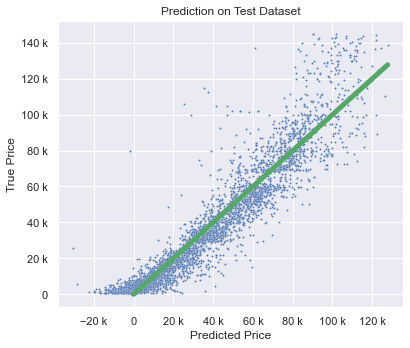

In [62]:
plot(test_pred, y_test, 'Test')

## Performance on Training Dataset

In [63]:
train = X_train[cols]
train = sm.add_constant(train)
train_pred = model.predict(train)

train_pred = np.squeeze(np.array(train_pred))
y_train = np.squeeze(np.array(y_train))

In [64]:
sm.tools.eval_measures.meanabs(y_train, train_pred)

8500.119586927443

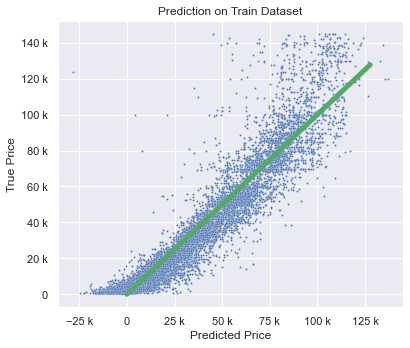

In [65]:
plot(train_pred, y_train, 'Train')

In [66]:
print('Dropping features with p-value P(t) > 0.05: \n')
cols = list(X_train.columns)
pmax = 1
i = 1
while (len(cols) > 0):
    p = []
    X_1 = X_train[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y_train, X_1).fit()
    p = pd.Series(model.pvalues.values[1:], index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if pmax > 0.05:
        cols.remove(feature_with_p_max)
        print(i,'. Dropped', feature_with_p_max, 'with p-value', pmax)
        i += 1
    else:
        break
selected_features = cols
print('\n\nSelected features: \n\n', selected_features)

Dropping features with p-value P(t) > 0.05: 



Selected features: 

 ['milage', 'hubraum', 'age', 'power_ps', 'amg', 'blk_series', 'blue_eff', 'elegance', 'tag_63', 'tag_55', 'tüv', 'E10', 'electric', 'transmission_Automatik', 'num_seats_17', 'num_seats_2', 'num_seats_3', 'num_seats_4', 'num_seats_5', 'num_seats_8', 'num_seats_na', 'num_doors_2/3', 'num_doors_4/5', 'num_doors_6/7', 'num_doors_na', 'emission_class_Euro1', 'emission_class_Euro4', 'emission_class_Euro5', 'emission_class_Euro6', 'emission_class_Euro6c', 'emission_class_Euro6d-TEMP', 'car_type_andere', 'car_type_cabrio', 'car_type_kleinwagen', 'car_type_sport', 'car_type_van', 'num_owners_1', 'num_owners_2', 'num_owners_3', 'Schaden_na', 'Schaden_repaired', 'Schaden_without', 'Model_A-Klasse', 'Model_B-Klasse', 'Model_C-Klasse', 'Model_CL', 'Model_CLA', 'Model_CLC', 'Model_CLK', 'Model_E-Klasse', 'Model_G-Klasse', 'Model_GLA', 'Model_GLB', 'Model_GLC', 'Model_GLE', 'Model_GLK', 'Model_GLS', 'Model_GT', 'Model_M-Klasse', 'M